In [1]:
# BASED ON scikit learn DOCUMENTATION
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_openml
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

In [2]:
import time

In [5]:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')

In [9]:
# http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf
# MODEL BUILD - RANDOM FORESTS
start = time.time()
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8765
Training time: 66.94578504562378s


In [31]:
# http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf
# MODEL BUILD - RANDOM FORESTS
start = time.time()
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8522
Training time: 7.251613616943359s


In [32]:
# http://ect.bell-labs.com/who/tkh/publications/papers/odt.pdf
# MODEL BUILD - RANDOM FORESTS
start = time.time()
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 1000)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_test, y_test))
predictions = forest.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8793
Training time: 663.4149007797241s


In [34]:
# !!!Dont run!!!
# NOTE: K-Nearest Neighbors is a "lazy" algorithm - the separation of test & training is not truly necessary - more details available at https://scikit-learn.org/stable/modules/neighbors.html
# MODEL BUILD - K-Nearest Neighbors - Just fit/score entire sample
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(X, y)
# neigh.score(X, y)

In [22]:
# !!!Dont run either!!!
# ok run it but its slow
# with just a sample
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
print('Score: ', neigh.score(X_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8497
Training time: 1164.340321779251s


In [23]:
# !!!Dont run either!!!
# ok run it but its slow
# with just a sample
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
print('Score: ', neigh.score(X_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.846
Training time: 1210.665132522583s


In [24]:
# !!!Dont run either!!!
# ok run it but its slow
# with just a sample
start = time.time()
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)
print('Score: ', neigh.score(X_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8541
Training time: 1250.9213700294495s


In [25]:
# MODEL BUILD - LINEAR

from sklearn import linear_model
start = time.time()
lmf = linear_model.SGDClassifier(max_iter=1000)
lmf.fit(X_train, y_train)
lmf.score(X_test, y_test)
print('Score: ', lmf.score(X_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.7958
Training time: 109.84839272499084s


In [26]:
# MODEL BUILD - SUPPORT VECTOR
from sklearn.svm import SVC
start = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
print('Score: ', svm.score(X_test, y_test))
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8828
Training time: 812.2729923725128s


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
# MODEL
# Initialize our classifier
gnb = GaussianNB()
# Train our classifier
start = time.time()
model = gnb.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.5406081676483154s


In [28]:
# MODEL
# Make predictions
start = time.time()
preds = gnb.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")
# print(preds)

Training time: 0.7485842704772949s


In [29]:
# MODEL
# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.5856


In [30]:
# INTERPRET
expected = y_test
predicted = preds
print(sklearn.metrics.confusion_matrix(expected, predicted))

[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]


In [20]:
# BASED ON EXAMPLE FROM STACKEXCHANGE - JahKnows (2018)
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [21]:
# doesnt work dont run
# claims 20x faster k nearest times
# use that GPU 
# https://github.com/facebookresearch/faiss/blob/master/INSTALL.md
# https://towardsdatascience.com/make-knn-300-times-faster-than-scikit-learns-in-20-lines-5e29d74e76bb
#import numpy as np
#import faiss


#class FaissKNeighbors:
#    def __init__(self, k=5):
#        self.index = None
#        self.y = None
#        self.k = k
#
#    def fit(self, X, y):
#        self.index = faiss.IndexFlatL2(X.shape[1])
#        self.index.add(X.astype(np.float32))
#        self.y = y
#
#    def predict(self, X):
#        distances, indices = self.index.search(X.astype(np.float32), k=self.k)
#        votes = self.y[indices]
#        predictions = np.array([np.argmax(np.bincount(x)) for x in votes])
#        return predictions

In [ ]:
# below is just me locking in the trying to illustrae what chab=nging the parameters does theres a summary in the PDF

In [58]:
# MODEL BUILD - LINEAR

from sklearn import linear_model
lmf1 = linear_model.SGDClassifier(max_iter=151)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7765

In [112]:
lmf1 = linear_model.SGDClassifier(max_iter=2)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7992

In [114]:
lmf1 = linear_model.SGDClassifier(max_iter=3)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7959

In [115]:
lmf1 = linear_model.SGDClassifier(max_iter=4)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7927

In [116]:
lmf1 = linear_model.SGDClassifier(max_iter=5)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.813

In [117]:
lmf1 = linear_model.SGDClassifier(max_iter=6)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7932

In [118]:
lmf1 = linear_model.SGDClassifier(max_iter=7)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7976

In [119]:
lmf1 = linear_model.SGDClassifier(max_iter=8)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7852

In [120]:
lmf1 = linear_model.SGDClassifier(max_iter=9)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7923

In [59]:
lmf1 = linear_model.SGDClassifier(max_iter=10)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7727

In [121]:
lmf1 = linear_model.SGDClassifier(max_iter=11)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7851

In [122]:
lmf1 = linear_model.SGDClassifier(max_iter=12)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7715

In [123]:
lmf1 = linear_model.SGDClassifier(max_iter=13)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8097

In [124]:
lmf1 = linear_model.SGDClassifier(max_iter=14)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8044

In [125]:
lmf1 = linear_model.SGDClassifier(max_iter=15)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8044

In [126]:
lmf1 = linear_model.SGDClassifier(max_iter=16)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7985

In [127]:
lmf1 = linear_model.SGDClassifier(max_iter=17)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8098

In [128]:
lmf1 = linear_model.SGDClassifier(max_iter=18)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7906

In [129]:
lmf1 = linear_model.SGDClassifier(max_iter=19)
lmf1.fit(X_train, y_train)
lmf1.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7701

In [60]:
lmf2 = linear_model.SGDClassifier(max_iter=20)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7083

In [130]:
lmf2 = linear_model.SGDClassifier(max_iter=21)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7973

In [131]:
lmf2 = linear_model.SGDClassifier(max_iter=22)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7488

In [132]:
lmf2 = linear_model.SGDClassifier(max_iter=23)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7766

In [133]:
lmf2 = linear_model.SGDClassifier(max_iter=24)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7414

In [134]:
lmf2 = linear_model.SGDClassifier(max_iter=25)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7835

In [135]:
lmf2 = linear_model.SGDClassifier(max_iter=26)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7935

In [136]:
lmf2 = linear_model.SGDClassifier(max_iter=27)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8257

In [137]:
lmf2 = linear_model.SGDClassifier(max_iter=28)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7931

In [138]:
lmf2 = linear_model.SGDClassifier(max_iter=29)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7744

In [62]:
lmf2 = linear_model.SGDClassifier(max_iter=30)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8166

In [139]:
lmf2 = linear_model.SGDClassifier(max_iter=31)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8039

In [140]:
lmf2 = linear_model.SGDClassifier(max_iter=32)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8055

In [141]:
lmf2 = linear_model.SGDClassifier(max_iter=33)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7862

In [142]:
lmf2 = linear_model.SGDClassifier(max_iter=34)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8037

In [143]:
lmf2 = linear_model.SGDClassifier(max_iter=35)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8084

In [144]:
lmf2 = linear_model.SGDClassifier(max_iter=36)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8032

In [145]:
lmf2 = linear_model.SGDClassifier(max_iter=37)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.77

In [146]:
lmf2 = linear_model.SGDClassifier(max_iter=38)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.794

In [147]:
lmf2 = linear_model.SGDClassifier(max_iter=39)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7245

In [148]:
lmf2 = linear_model.SGDClassifier(max_iter=40)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.755

In [149]:
lmf2 = linear_model.SGDClassifier(max_iter=41)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8118

In [150]:
lmf2 = linear_model.SGDClassifier(max_iter=42)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8042

In [151]:
lmf2 = linear_model.SGDClassifier(max_iter=43)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7743

In [152]:
lmf2 = linear_model.SGDClassifier(max_iter=44)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7999

In [153]:
lmf2 = linear_model.SGDClassifier(max_iter=45)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7778

In [154]:
lmf2 = linear_model.SGDClassifier(max_iter=46)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8087

In [155]:
lmf2 = linear_model.SGDClassifier(max_iter=47)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7368

In [156]:
lmf2 = linear_model.SGDClassifier(max_iter=48)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7826

In [157]:
lmf2 = linear_model.SGDClassifier(max_iter=49)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.825

In [64]:
lmf2 = linear_model.SGDClassifier(max_iter=50)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.81

In [158]:
lmf2 = linear_model.SGDClassifier(max_iter=51)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7835

In [159]:
lmf2 = linear_model.SGDClassifier(max_iter=52)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8018

In [160]:
lmf2 = linear_model.SGDClassifier(max_iter=53)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8103

In [161]:
lmf2 = linear_model.SGDClassifier(max_iter=54)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7868

In [162]:
lmf2 = linear_model.SGDClassifier(max_iter=55)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7681

In [163]:
lmf2 = linear_model.SGDClassifier(max_iter=56)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8044

In [164]:
lmf2 = linear_model.SGDClassifier(max_iter=57)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.792

In [165]:
lmf2 = linear_model.SGDClassifier(max_iter=58)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8123

In [166]:
lmf2 = linear_model.SGDClassifier(max_iter=59)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7976

In [65]:
lmf2 = linear_model.SGDClassifier(max_iter=60)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7863

In [167]:
lmf2 = linear_model.SGDClassifier(max_iter=61)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8177

In [168]:
lmf2 = linear_model.SGDClassifier(max_iter=62)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7608

In [169]:
lmf2 = linear_model.SGDClassifier(max_iter=63)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.806

In [170]:
lmf2 = linear_model.SGDClassifier(max_iter=64)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8081

In [171]:
lmf2 = linear_model.SGDClassifier(max_iter=65)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8025

In [172]:
lmf2 = linear_model.SGDClassifier(max_iter=66)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7501

In [173]:
lmf2 = linear_model.SGDClassifier(max_iter=67)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8018

In [174]:
lmf2 = linear_model.SGDClassifier(max_iter=68)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7675

In [175]:
lmf2 = linear_model.SGDClassifier(max_iter=69)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7135

In [66]:
lmf2 = linear_model.SGDClassifier(max_iter=70)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.791

In [176]:
lmf2 = linear_model.SGDClassifier(max_iter=71)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8131

In [177]:
lmf2 = linear_model.SGDClassifier(max_iter=72)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7564

In [178]:
lmf2 = linear_model.SGDClassifier(max_iter=73)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7114

In [179]:
lmf2 = linear_model.SGDClassifier(max_iter=74)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8155

In [180]:
lmf2 = linear_model.SGDClassifier(max_iter=75)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7971

In [181]:
lmf2 = linear_model.SGDClassifier(max_iter=76)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7828

In [182]:
lmf2 = linear_model.SGDClassifier(max_iter=77)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7311

In [183]:
lmf2 = linear_model.SGDClassifier(max_iter=78)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8146

In [184]:
lmf2 = linear_model.SGDClassifier(max_iter=79)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8024

In [67]:
lmf2 = linear_model.SGDClassifier(max_iter=80)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7744

In [185]:
lmf2 = linear_model.SGDClassifier(max_iter=81)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7911

In [186]:
lmf2 = linear_model.SGDClassifier(max_iter=82)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8045

In [187]:
lmf2 = linear_model.SGDClassifier(max_iter=83)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7856

In [188]:
lmf2 = linear_model.SGDClassifier(max_iter=84)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7606

In [189]:
lmf2 = linear_model.SGDClassifier(max_iter=85)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7739

In [190]:
lmf2 = linear_model.SGDClassifier(max_iter=86)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7819

In [191]:
lmf2 = linear_model.SGDClassifier(max_iter=87)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7984

In [192]:
lmf2 = linear_model.SGDClassifier(max_iter=88)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7993

In [193]:
lmf2 = linear_model.SGDClassifier(max_iter=89)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7698

In [68]:
lmf2 = linear_model.SGDClassifier(max_iter=90)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7827

In [194]:
lmf2 = linear_model.SGDClassifier(max_iter=91)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7957

In [195]:
lmf2 = linear_model.SGDClassifier(max_iter=92)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8242

In [196]:
lmf2 = linear_model.SGDClassifier(max_iter=93)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7804

In [197]:
lmf2 = linear_model.SGDClassifier(max_iter=94)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8159

In [198]:
lmf2 = linear_model.SGDClassifier(max_iter=95)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7993

In [199]:
lmf2 = linear_model.SGDClassifier(max_iter=96)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7914

In [200]:
lmf2 = linear_model.SGDClassifier(max_iter=97)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.786

In [201]:
lmf2 = linear_model.SGDClassifier(max_iter=98)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7417

In [202]:
lmf2 = linear_model.SGDClassifier(max_iter=99)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7789

In [69]:
lmf2 = linear_model.SGDClassifier(max_iter=100)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7608

In [203]:
lmf2 = linear_model.SGDClassifier(max_iter=101)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8129

In [204]:
lmf2 = linear_model.SGDClassifier(max_iter=102)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8163

In [205]:
lmf2 = linear_model.SGDClassifier(max_iter=103)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7957

In [206]:
lmf2 = linear_model.SGDClassifier(max_iter=104)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8118

In [207]:
lmf2 = linear_model.SGDClassifier(max_iter=105)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7625

In [208]:
lmf2 = linear_model.SGDClassifier(max_iter=106)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7969

In [209]:
lmf2 = linear_model.SGDClassifier(max_iter=107)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8177

In [210]:
lmf2 = linear_model.SGDClassifier(max_iter=108)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7531

In [211]:
lmf2 = linear_model.SGDClassifier(max_iter=109)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7962

In [70]:
lmf2 = linear_model.SGDClassifier(max_iter=110)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.781

In [212]:
lmf2 = linear_model.SGDClassifier(max_iter=111)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7638

In [213]:
lmf2 = linear_model.SGDClassifier(max_iter=112)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7878

In [214]:
lmf2 = linear_model.SGDClassifier(max_iter=113)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.806

In [215]:
lmf2 = linear_model.SGDClassifier(max_iter=114)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7543

In [216]:
lmf2 = linear_model.SGDClassifier(max_iter=115)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7672

In [217]:
lmf2 = linear_model.SGDClassifier(max_iter=116)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7915

In [218]:
lmf2 = linear_model.SGDClassifier(max_iter=117)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8085

In [219]:
lmf2 = linear_model.SGDClassifier(max_iter=118)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8

In [220]:
lmf2 = linear_model.SGDClassifier(max_iter=119)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7916

In [71]:
lmf2 = linear_model.SGDClassifier(max_iter=120)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7534

In [221]:
lmf2 = linear_model.SGDClassifier(max_iter=121)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8154

In [222]:
lmf2 = linear_model.SGDClassifier(max_iter=122)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8029

In [223]:
lmf2 = linear_model.SGDClassifier(max_iter=123)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8198

In [224]:
lmf2 = linear_model.SGDClassifier(max_iter=124)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8059

In [225]:
lmf2 = linear_model.SGDClassifier(max_iter=125)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8027

In [226]:
lmf2 = linear_model.SGDClassifier(max_iter=126)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7832

In [227]:
lmf2 = linear_model.SGDClassifier(max_iter=127)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8066

In [228]:
lmf2 = linear_model.SGDClassifier(max_iter=128)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8068

In [229]:
lmf2 = linear_model.SGDClassifier(max_iter=129)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8133

In [72]:
lmf2 = linear_model.SGDClassifier(max_iter=130)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8077

In [230]:
lmf2 = linear_model.SGDClassifier(max_iter=131)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8098

In [231]:
lmf2 = linear_model.SGDClassifier(max_iter=132)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7716

In [232]:
lmf2 = linear_model.SGDClassifier(max_iter=133)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8056

In [233]:
lmf2 = linear_model.SGDClassifier(max_iter=134)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7347

In [234]:
lmf2 = linear_model.SGDClassifier(max_iter=135)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7912

In [235]:
lmf2 = linear_model.SGDClassifier(max_iter=136)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7838

In [236]:
lmf2 = linear_model.SGDClassifier(max_iter=137)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8043

In [237]:
lmf2 = linear_model.SGDClassifier(max_iter=138)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7653

In [238]:
lmf2 = linear_model.SGDClassifier(max_iter=139)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7706

In [73]:
lmf2 = linear_model.SGDClassifier(max_iter=140)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7892

In [239]:
lmf2 = linear_model.SGDClassifier(max_iter=141)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7884

In [240]:
lmf2 = linear_model.SGDClassifier(max_iter=142)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7356

In [241]:
lmf2 = linear_model.SGDClassifier(max_iter=143)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8115

In [242]:
lmf2 = linear_model.SGDClassifier(max_iter=144)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8062

In [243]:
lmf2 = linear_model.SGDClassifier(max_iter=145)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8032

In [244]:
lmf2 = linear_model.SGDClassifier(max_iter=146)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8104

In [245]:
lmf2 = linear_model.SGDClassifier(max_iter=147)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8146

In [246]:
lmf2 = linear_model.SGDClassifier(max_iter=148)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7739

In [247]:
lmf2 = linear_model.SGDClassifier(max_iter=149)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8028

In [74]:
lmf2 = linear_model.SGDClassifier(max_iter=150)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.808

In [75]:
lmf2 = linear_model.SGDClassifier(max_iter=160)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8057

In [76]:
lmf2 = linear_model.SGDClassifier(max_iter=170)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.745

In [77]:
lmf2 = linear_model.SGDClassifier(max_iter=180)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7821

In [78]:
lmf2 = linear_model.SGDClassifier(max_iter=190)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8094

In [79]:
lmf2 = linear_model.SGDClassifier(max_iter=200)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7529

In [80]:
lmf2 = linear_model.SGDClassifier(max_iter=210)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7263

In [81]:
lmf2 = linear_model.SGDClassifier(max_iter=220)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8107

In [83]:
lmf2 = linear_model.SGDClassifier(max_iter=230)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7599

In [82]:
lmf2 = linear_model.SGDClassifier(max_iter=240)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8137

In [84]:
lmf2 = linear_model.SGDClassifier(max_iter=250)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.818

In [86]:
lmf2 = linear_model.SGDClassifier(max_iter=260)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8156

In [87]:
lmf2 = linear_model.SGDClassifier(max_iter=270)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7915

In [88]:
lmf2 = linear_model.SGDClassifier(max_iter=280)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7846

In [89]:
lmf2 = linear_model.SGDClassifier(max_iter=290)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8007

In [90]:
lmf2 = linear_model.SGDClassifier(max_iter=300)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8118

In [91]:
lmf2 = linear_model.SGDClassifier(max_iter=310)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.7927

In [92]:
lmf2 = linear_model.SGDClassifier(max_iter=320)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7687

In [93]:
lmf2 = linear_model.SGDClassifier(max_iter=330)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.765

In [94]:
lmf2 = linear_model.SGDClassifier(max_iter=340)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7618

In [95]:
lmf2 = linear_model.SGDClassifier(max_iter=350)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7846

In [96]:
lmf2 = linear_model.SGDClassifier(max_iter=360)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8113

In [97]:
lmf2 = linear_model.SGDClassifier(max_iter=370)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

C:\Users\conwa\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.8163

In [98]:
lmf2 = linear_model.SGDClassifier(max_iter=380)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7968

In [99]:
lmf2 = linear_model.SGDClassifier(max_iter=390)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7955

In [100]:
lmf2 = linear_model.SGDClassifier(max_iter=400)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8169

In [101]:
lmf2 = linear_model.SGDClassifier(max_iter=410)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8077

In [102]:
lmf2 = linear_model.SGDClassifier(max_iter=420)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7526

In [103]:
lmf2 = linear_model.SGDClassifier(max_iter=430)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7713

In [104]:
lmf2 = linear_model.SGDClassifier(max_iter=440)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8262

In [105]:
lmf2 = linear_model.SGDClassifier(max_iter=450)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7775

In [106]:
lmf2 = linear_model.SGDClassifier(max_iter=460)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7876

In [107]:
lmf2 = linear_model.SGDClassifier(max_iter=470)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.8167

In [108]:
lmf2 = linear_model.SGDClassifier(max_iter=480)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7978

In [109]:
lmf2 = linear_model.SGDClassifier(max_iter=490)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7842

In [110]:
lmf2 = linear_model.SGDClassifier(max_iter=500)
lmf2.fit(X_train, y_train)
lmf2.score(X_test, y_test)

0.7619

In [6]:
# MODEL BUILD - DECISION TREE - Using giniIndex
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "gini",
            max_depth=3)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.4988
Training time: 5.651990652084351s


In [7]:
# MODEL BUILD - DECISION TREE - Using giniIndex (Adjust Max Depth)
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "gini",
            max_depth=10)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8004
Training time: 18.36698269844055s


In [8]:
# MODEL BUILD - DECISION TREE - Using giniIndex (Adjust Max Depth)
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "gini",
            max_depth=15)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8065
Training time: 27.110334157943726s


In [9]:
# MODEL BUILD - DECISION TREE - Using Entropy 
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "entropy",
            max_depth=3)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.5127
Training time: 6.01954460144043s


In [10]:
# MODEL BUILD - DECISION TREE - Using Entropy (Adjust Max Depth)
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "entropy",
            max_depth=10)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8103
Training time: 22.72502565383911s


In [11]:
# MODEL BUILD - DECISION TREE - Using Entropy (Adjust Max Depth)
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "entropy",
            max_depth=15)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8079
Training time: 31.942535638809204s


In [12]:
# MODEL BUILD - DECISION TREE - Using Entropy (Adjust Max Depth)
start = time.time()
from sklearn.tree import DecisionTreeClassifier 
decisionTree = DecisionTreeClassifier(criterion = "entropy",
            max_depth=12)

decisionTree.fit(X_train, y_train)
print('Score: ', decisionTree.score(X_test, y_test))
predictions = decisionTree.predict(X_test)
stop = time.time()
print(f"Training time: {stop - start}s")

Score:  0.8119
Training time: 26.743321895599365s


In [234]:
#Import Modules for plots
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
import warnings
warnings.filterwarnings("ignore")

In [236]:
#Create data frame for model evaluation
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Linear Model', 'Support Vector Model',
                'Logistic Regression', 'Gaussian Naïve Bayes', 'Decision Tree', 'Keras Tensor Flow', 'XGBoost']
model_scores = [0.88, 0.85, 0.83, 0.88, 0.84, 0.59, 0.82, 0.89, 0.91]
model_run_times = [66.95, 1250.92, 109.85, 812.27, 147.96, 0.54, 27.00, 8.00, 864.88]
model_df = pd.DataFrame({'Model Name': model_names, 'Score': model_scores, 'Run Time': model_run_times})
model_df = model_df.set_index('Model Name')  
model_df = model_df.sort_values('Score', ascending=False)
dfi.export(model_df, "model_df.png")
model_df

,Score,Run Time
Model Name,,
XGBoost,0.91,864.88
Keras Tensor Flow,0.89,8.00
Random Forest,0.88,66.95
Support Vector Model,0.88,812.27
K-Nearest Neighbors,0.85,1250.92
Logistic Regression,0.84,147.96
Linear Model,0.83,109.85
Decision Tree,0.82,27.00
Gaussian Naïve Bayes,0.59,0.54


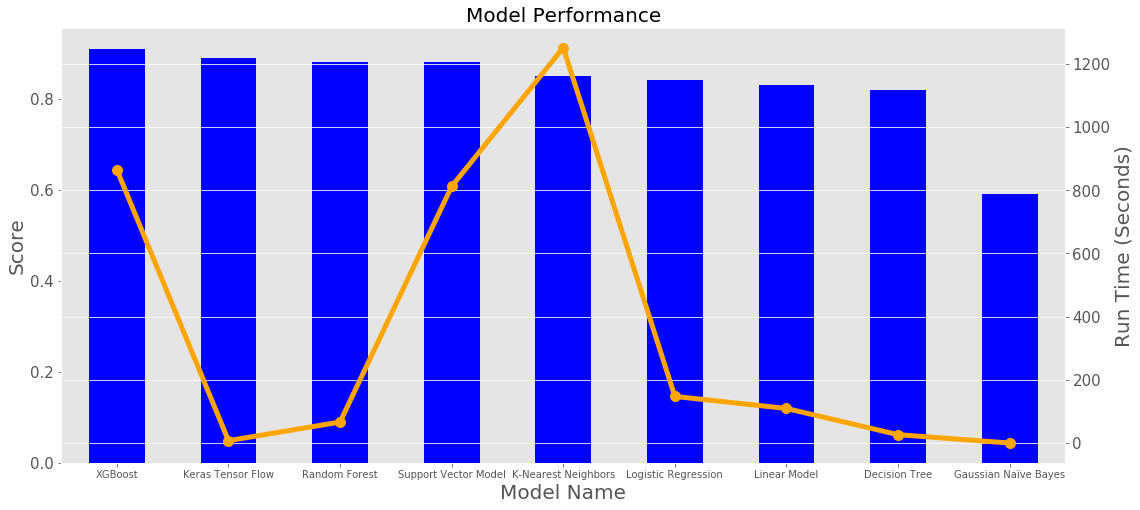

In [233]:
#Create Plot
plt.style.use('ggplot')
model_plot = model_df['Score'].plot.bar(figsize =(18,8),cmap='tab20', color='blue')
plt.ylabel('Score', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.title('Model Performance', fontsize=20)
model_df['Run Time'].plot(secondary_y=True, color = 'orange', linewidth=5, marker ='o', markersize=10).set_ylabel('Run Time (Seconds)', fontsize=20)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.savefig("model_performance1.png", bbox_inches='tight')

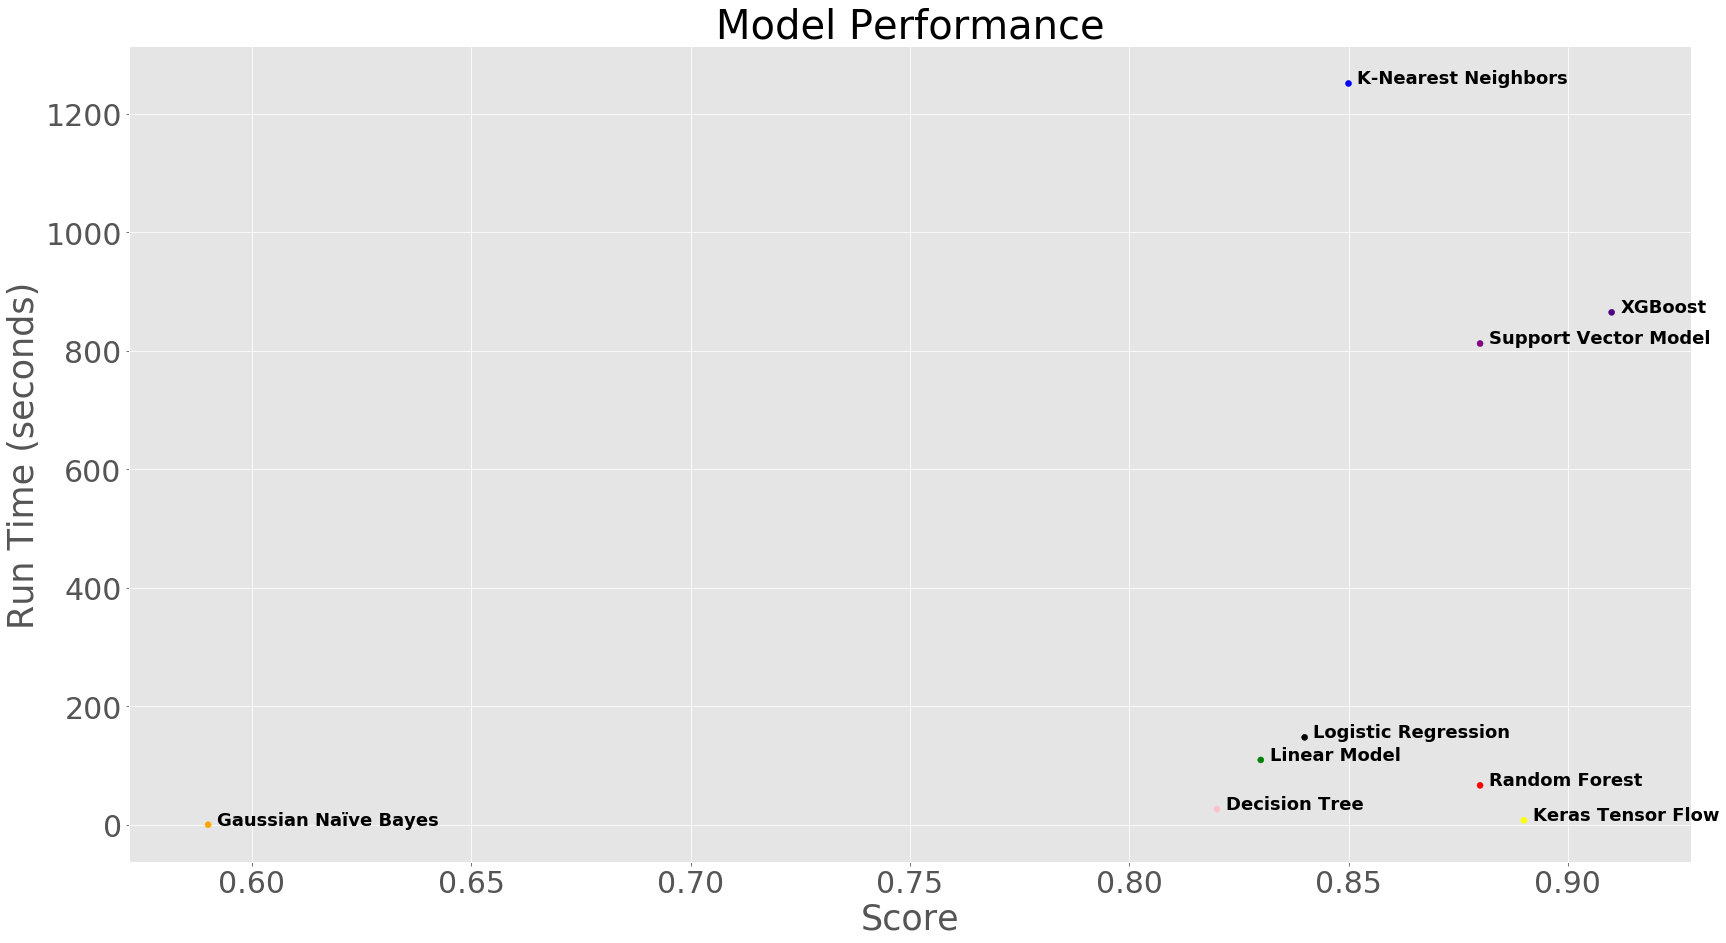

In [229]:
#Create 2nd Plot
z = model_scores
y = model_run_times
n = model_names
colors = ['red', 'blue', 'green', 'purple', 'black', 'orange', 'pink', 'yellow', 'indigo']
fig, ax = plt.subplots(figsize=(28,15))
ax.scatter(z, y, c=colors)
plt.ylabel('Run Time (seconds)', fontsize=35)
plt.xlabel('Score', fontsize=35)
plt.title('Model Performance', fontsize=40)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)  
for i, txt in enumerate(n):
    ax.annotate(txt, (z[i]+.002, y[i]), fontsize=18, weight='bold')
plt.savefig("model_performance2.png", bbox_inches='tight')